<a href="https://colab.research.google.com/github/aka-gera/Data_Classification/blob/main/Game_of_Thrones_Battles_and_Deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis
# !ls

Mounted at /content/drive
/content
/content/drive/MyDrive/ML2023/data-analysis


# **CLASSIFIER**

*This algorithm will identify the optimal classification machine learning model for a given dataset.*

# Import the helper classes

In [2]:
!pip install AutoLogging-ML
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math
from plotly.subplots import make_subplots
from AutoLogging_ML import AutoLogger
import seaborn as sns

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [4]:
import warnings
from sklearn.exceptions import FitFailedWarning
# Filter out the FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information




The data is provided by:https://www.kaggle.com/datasets/ulrikthygepedersen/game-of-thrones-character-deaths

| Column Name          | Description                                                                                       |
|----------------------|---------------------------------------------------------------------------------------------------|
| Name                 | Name of the character and additional information, if available                                    |
| Allegiance           | Allegiance of the character, which house or family the character belongs to                       |
| Death Year           | Death year of the character, according to the Game of Thrones timeline                           |
| Book of Death        | Book number the character died in                                                                |
| Death Chapter        | Chapter number the character died in                                                             |
| Book Intro Chapter   | Chapter where the character was introduced                                                       |
| Gender               | Gender of the character, 1 for male and 0 for female                                             |
| Nobility             | Nobility of the character, 1 for noble and 0 for commoner                                        |
| A Game of Thrones   | Did the character die in the book "A Game of Thrones"? 1 for yes and 0 for no                    |
| A Clash of Kings    | Did the character die in the book "A Clash of Kings"? 1 for yes and 0 for no                     |
| A Storm of Swords   | Did the character die in the book "A Storm of Swords"? 1 for yes and 0 for no                    |
| A Feast for Crows   | Did the character die in the book "A Feast for Crows"? 1 for yes and 0 for no                    |
| A Dance with Dragons| Did the character die in the book "A Dance with Dragons"? 1 for yes and 0 for no                 |


# Import Dataset

In [6]:
df = aka_clean.df_get('Game_of_Thrones_Battles_Deaths/character-predictions_pose.csv')

In [7]:
df.head()

,index,S.No,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,0,1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,1,2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,2,3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,3,4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1946 non-null   int64  
 1   S.No               1946 non-null   int64  
 2   plod               1946 non-null   float64
 3   name               1946 non-null   object 
 4   title              938 non-null    object 
 5   male               1946 non-null   int64  
 6   culture            677 non-null    object 
 7   dateOfBirth        433 non-null    float64
 8   DateoFdeath        444 non-null    float64
 9   mother             21 non-null     object 
 10  father             26 non-null     object 
 11  heir               23 non-null     object 
 12  house              1519 non-null   object 
 13  spouse             276 non-null    object 
 14  book1              1946 non-null   int64  
 15  book2              1946 non-null   int64  
 16  book3              1946 

In [9]:
df.describe()

,index,S.No,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,972.500000,973.500000,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,0.480473,0.591984,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,561.906131,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,0.499747,0.491593,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,0.000000,1.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,486.250000,487.250000,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,972.500000,973.500000,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1458.750000,1459.750000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1945.000000,1946.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


# Clean Data

## Drop Duplicate data

In [10]:
df.drop_duplicates()

,index,S.No,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,0,1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,1,2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,2,3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,3,4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1941,1942,0.197,Luwin,NaN,1,Westeros,NaN,299.0,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1942,1943,0.013,Reek,NaN,1,NaN,NaN,299.0,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1943,1944,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1944,1945,0.363,Coldhands,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


## Swap the target and the last feature

In [11]:
df = aka_clean.swap_features(df,-1)
df.head()

Invalid feature indices or feat_a is equal to feat_b.


,index,S.No,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,0,1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,1,2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,2,3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,3,4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


## Drop feature(s)


In [12]:
feat =  [0,1]
df = aka_clean.drop_feature(df,feat)
df.head()

,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


##  Convert categorical variables into numerical representations

In [13]:
mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping)
df.head()

,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,0.946,0,1.0,1,5.0,286.0,299.0,0.0,0.0,0.0,...,0.0,1.0,0,0,100.0,11,1,1,0.605351,0
1,0.613,1,0.0,1,0.0,208.0,299.0,0.0,0.0,4.0,...,1.0,1.0,1,1,97.0,1,1,1,0.896321,1
2,0.507,2,1.0,1,5.0,286.0,299.0,0.0,0.0,4.0,...,1.0,1.0,0,1,100.0,0,0,0,0.267559,1
3,0.924,3,2.0,0,5.0,82.0,105.0,0.0,0.0,4.0,...,1.0,0.0,1,1,23.0,0,0,0,0.183946,0
4,0.383,4,3.0,0,1.0,276.0,299.0,0.0,0.0,4.0,...,1.0,1.0,1,1,29.0,0,0,0,0.043478,1


## Balance Dataset

In [14]:
aka_plot.plot_pie(df,-1)

In [15]:
# df = aka_clean.balance_df(df,'j')
# aka_plot.plot_pie(df, -1)

## Clean Dataset

## Correlation Matrix

In [16]:
aka_corr_an.Plot_Correlation_Matrix(df)

In [17]:

confidence_interval_limit =   [-3,3]             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

correlation_percentage_threshold = .7      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

diff_shape = (df.shape[0]-df_filtered.shape[0],df.shape[1]-df_filtered.shape[1])
diff_shape,df_filtered.shape

((368, 4), (1578, 25))

## Graph the features that are highly correlated


In [18]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp),400,500,3)
if fig is not None:
    fig.show()

## Visualize the distribution of the filtered dataset

In [19]:
aka_plot.Plot_box_Features(df,df_filtered,400,500,3,range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

In [20]:
pre_proc = 'X'                             # Choose between 'XY' to standardize both 'X' and 'Y',
                                              #                'X' to standardize only 'X',
                                              #                'Y' to standardize only 'Y',

X_train, X_test, y_train, y_test = aka_learn.Learning_data(df_filtered,pre_proc)

In [21]:

r,model =AutoLogger.train_and_log_classification(X_train,y_train,X_test,y_test,size='large')
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:954: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:954: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951

In [22]:
model

RandomForestClassifier()

<Axes: xlabel='validation-accuracy', ylabel='model'>

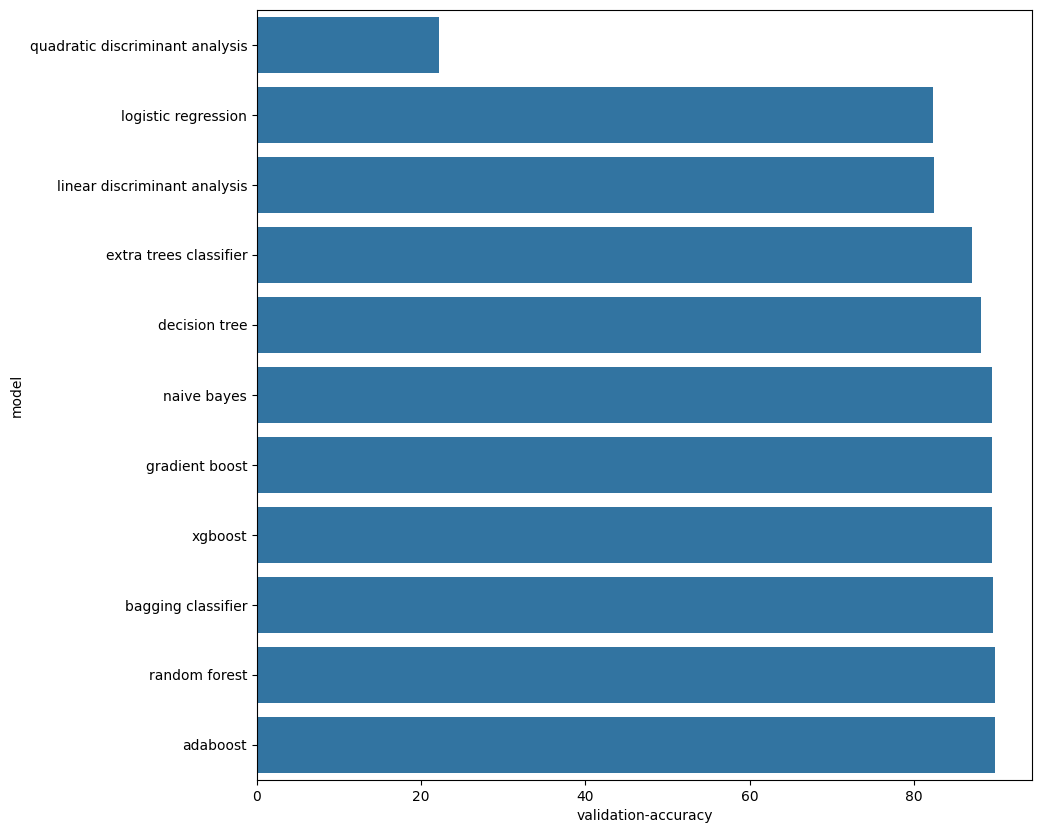

In [23]:
AutoLogger.get_metric_plot_classification(r,'validation','accuracy')

## Confusion Matrix

In [24]:
y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)
Label = [ str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [25]:
shw = 1
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label,shw)
fig2.show()

## Classification Report

In [26]:
shw = 1
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label,shw)
fig3.show()